In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
list_of_files = ['data_2015_1.txt','data_2015_2.txt','data_2015_3.txt','data_2015_4.txt','data_2015_5.txt']
# list_of_files = ['data_2015_12.txt','data_2016_1.txt']
lists_of_dataframe = [pd.read_table(list_of_files[i],header=None) for i in range(len(list_of_files))]

In [3]:
df = pd.concat(lists_of_dataframe,axis=0,ignore_index=True)

df.columns = ['uuid','flover_raw','time']
df['time'] = pd.to_datetime(df['time'])
df['flover'] = df['flover_raw'].apply(lambda x:int(x[x.find('r')+1:]))
df['date'] = df['time'].apply(lambda x:pd.datetime.date(x))

df = df[['flover','time','date']]

In [4]:
flavors_unique = np.sort(np.array(df['flover'].unique(),dtype=np.int))
# flavors_unique_counts = [np.count_nonzero(df['flover'] == i) for i in flavors_unique]

In [5]:
start_date = df.loc[0].date
end_date = df.loc[df.shape[0]-1].date

In [6]:
flavers = {1:(1,1024),2:(1,2048),3:(1,4096),4:(2,2048),5:(2,4096),6:(2,8192),7:(4,4096),8:(4,8192),9:(4,16384),10:(8,8192),11:(8,16384),12:(8,32768),13:(16,16384),14:(16,32768),15:(16,65536)}

In [7]:
observation = pd.DataFrame(index=pd.date_range(start_date,end_date),columns=flavors_unique).fillna(0)
for i in flavors_unique:
    observation[i] = df[df['flover']==i][['flover','date']].groupby('date').count()
observation = observation.fillna(0)

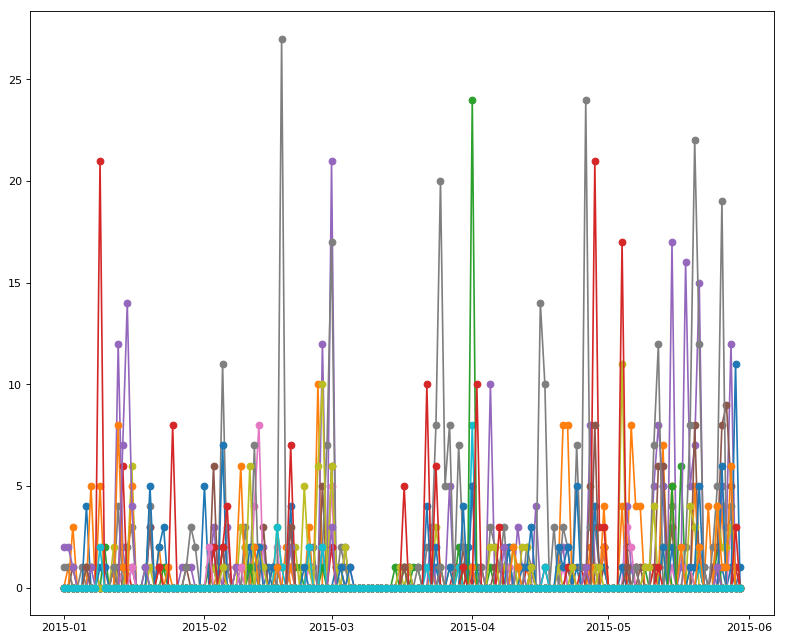

In [8]:
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(observation,marker='o')
plt.show()

In [9]:
observation = pd.DataFrame(index=pd.date_range(start_date,end_date),columns=flavors_unique).fillna(0)
for i in flavors_unique:
    observation[i] = df[df['flover']==i][['flover','date']].groupby('date').count()
observation = observation.fillna(0)

In [10]:
new_X = observation.resample('W').sum()

In [11]:
new_X.cov()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,21,22,23
1,2.528139,3.121212,0.943723,0.259740,14.450216,5.904762,1.575758,7.952381,2.541126,0.891775,1.917749,1.316017,4.082251,-0.121212,-2.155844,0.329004,-0.116883,-0.082251,0.398268,-0.129870
2,3.121212,35.108225,0.233766,-0.060606,31.367965,10.476190,7.073593,29.000000,17.961039,-0.554113,1.030303,-4.199134,-3.839827,3.463203,-4.887446,0.735931,-0.415584,-0.350649,0.389610,-0.398268
3,0.943723,0.233766,3.231602,0.099567,6.575758,3.833333,-0.175325,3.595238,1.155844,0.359307,0.688312,1.391775,1.716450,0.456710,-1.116883,-0.277056,0.043290,-0.025974,-0.367965,0.021645
4,0.259740,-0.060606,0.099567,0.727273,1.060606,1.190476,-0.692641,3.190476,-0.341991,0.173160,1.112554,0.818182,1.411255,1.584416,1.077922,0.264069,0.034632,0.112554,-0.103896,-0.077922
5,14.450216,31.367965,6.575758,1.060606,164.346320,54.714286,8.735931,105.333333,43.419913,4.554113,5.922078,10.675325,8.506494,-20.701299,5.220779,-2.116883,-0.251082,0.160173,-2.580087,-0.935065
6,5.904762,10.476190,3.833333,1.190476,54.714286,36.261905,3.880952,32.023810,15.952381,-0.809524,12.761905,9.976190,-0.309524,-6.880952,-3.952381,-0.523810,0.095238,-0.333333,-0.476190,-0.333333
7,1.575758,7.073593,-0.175325,-0.692641,8.735931,3.880952,8.409091,6.214286,11.350649,0.320346,-0.034632,2.435065,-1.941558,-3.668831,-0.965368,-0.051948,0.359307,-0.129870,2.683983,-0.177489
8,7.952381,29.000000,3.595238,3.190476,105.333333,32.023810,6.214286,235.880952,29.285714,6.619048,18.714286,-5.642857,-3.880952,-35.404762,-9.857143,-3.142857,-0.904762,1.238095,-0.761905,-1.285714
9,2.541126,17.961039,1.155844,-0.341991,43.419913,15.952381,11.350649,29.285714,40.450216,3.233766,-4.043290,4.502165,-3.813853,-5.389610,6.043290,-1.255411,-0.086580,0.194805,0.212121,-0.233766
10,0.891775,-0.554113,0.359307,0.173160,4.554113,-0.809524,0.320346,6.619048,3.233766,3.896104,0.770563,-2.043290,8.181818,0.887446,-0.865801,0.012987,-0.173160,-0.038961,-0.385281,-0.086580


In [12]:
c = 0
print('{')
for i in new_X.corr().columns:
    print(i,':',c,',')
    c+=1
print('}')

{
1 : 0 ,
2 : 1 ,
3 : 2 ,
4 : 3 ,
5 : 4 ,
6 : 5 ,
7 : 6 ,
8 : 7 ,
9 : 8 ,
10 : 9 ,
11 : 10 ,
12 : 11 ,
13 : 12 ,
14 : 13 ,
15 : 14 ,
17 : 15 ,
18 : 16 ,
21 : 17 ,
22 : 18 ,
23 : 19 ,
}


In [39]:
np.array(new_X).shape

(22, 20)

In [44]:
np.cov(new_X.T)

array([[  2.52813853e+00,   3.12121212e+00,   9.43722944e-01,
          2.59740260e-01,   1.44502165e+01,   5.90476190e+00,
          1.57575758e+00,   7.95238095e+00,   2.54112554e+00,
          8.91774892e-01,   1.91774892e+00,   1.31601732e+00,
          4.08225108e+00,  -1.21212121e-01,  -2.15584416e+00,
          3.29004329e-01,  -1.16883117e-01,  -8.22510823e-02,
          3.98268398e-01,  -1.29870130e-01],
       [  3.12121212e+00,   3.51082251e+01,   2.33766234e-01,
         -6.06060606e-02,   3.13679654e+01,   1.04761905e+01,
          7.07359307e+00,   2.90000000e+01,   1.79610390e+01,
         -5.54112554e-01,   1.03030303e+00,  -4.19913420e+00,
         -3.83982684e+00,   3.46320346e+00,  -4.88744589e+00,
          7.35930736e-01,  -4.15584416e-01,  -3.50649351e-01,
          3.89610390e-01,  -3.98268398e-01],
       [  9.43722944e-01,   2.33766234e-01,   3.23160173e+00,
          9.95670996e-02,   6.57575758e+00,   3.83333333e+00,
         -1.75324675e-01,   3.59523810e+00

In [46]:
c = np.cov(new_X.T)

In [55]:
c

array([[  2.52813853e+00,   3.12121212e+00,   9.43722944e-01,
          2.59740260e-01,   1.44502165e+01,   5.90476190e+00,
          1.57575758e+00,   7.95238095e+00,   2.54112554e+00,
          8.91774892e-01,   1.91774892e+00,   1.31601732e+00,
          4.08225108e+00,  -1.21212121e-01,  -2.15584416e+00,
          3.29004329e-01,  -1.16883117e-01,  -8.22510823e-02,
          3.98268398e-01,  -1.29870130e-01],
       [  3.12121212e+00,   3.51082251e+01,   2.33766234e-01,
         -6.06060606e-02,   3.13679654e+01,   1.04761905e+01,
          7.07359307e+00,   2.90000000e+01,   1.79610390e+01,
         -5.54112554e-01,   1.03030303e+00,  -4.19913420e+00,
         -3.83982684e+00,   3.46320346e+00,  -4.88744589e+00,
          7.35930736e-01,  -4.15584416e-01,  -3.50649351e-01,
          3.89610390e-01,  -3.98268398e-01],
       [  9.43722944e-01,   2.33766234e-01,   3.23160173e+00,
          9.95670996e-02,   6.57575758e+00,   3.83333333e+00,
         -1.75324675e-01,   3.59523810e+00

In [14]:
import math
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [15]:
X = np.array([1,2,3,4,5,6,7,8,9]).reshape(-1,1)
y = np.array([math.sin(x) for x in X]).reshape(-1,1)

In [16]:
_X = PolynomialFeatures(degree=4).fit_transform(X)

In [17]:
lr = LinearRegression()
lr.fit(_X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
xx = np.arange(1,9,0.01).reshape(-1,1)
xx_ = PolynomialFeatures(degree=4).fit_transform(xx)

In [19]:
yyy =np.sum(xx_*lr.coef_,axis=1)+ lr.intercept_

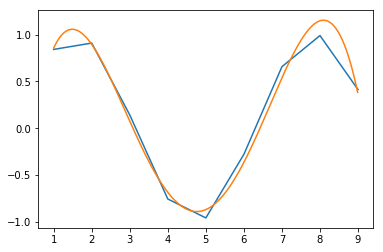

In [20]:
plt.plot(X,y)
plt.plot(xx,yyy)
plt.show()

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation

Using TensorFlow backend.


In [22]:
model = Sequential()

In [23]:
len([[ 1.        ,  0.33129769,  0.33016814,  0.19155354,  0.70891461,
         0.61670384,  0.34175466,  0.32564942,  0.25128425,  0.28414469,
         0.29137978,  0.19281501,  0.47742019, -0.00998223, -0.25540678,
         0.11576546, -0.14670447, -0.17580539,  0.19277428, -0.19155354],
       [ 0.33129769,  1.        ,  0.02194666, -0.01199397,  0.41295423,
         0.29361189,  0.41168127,  0.31867436,  0.47661378, -0.04737817,
         0.04200767, -0.16509541, -0.12050601,  0.07653419, -0.15537925,
         0.06948808, -0.13997382, -0.20112201,  0.05060574, -0.15763504],
       [ 0.33016814,  0.02194666,  1.        ,  0.06494688,  0.28533621,
         0.3541134 , -0.03363254,  0.13021838,  0.10109506,  0.10126093,
         0.09250055,  0.1803598 ,  0.17755128,  0.03326699, -0.11703461,
        -0.08622573,  0.0480586 , -0.04910451, -0.15753306,  0.02823777],
       [ 0.19155354, -0.01199397,  0.06494688,  1.        ,  0.097012  ,
         0.23181779, -0.28008176,  0.24359054, -0.06305304,  0.1028689 ,
         0.31516689,  0.22350171,  0.30772195,  0.24327773,  0.23809716,
         0.17323954,  0.08104409,  0.44854261, -0.09376145, -0.21428571],
       [ 0.70891461,  0.41295423,  0.28533621,  0.097012  ,  1.        ,
         0.70875386,  0.23499286,  0.53498228,  0.53253547,  0.17997348,
         0.11159949,  0.19399064,  0.12338776, -0.21144601,  0.07671333,
        -0.09238356, -0.03908661,  0.04246203, -0.15489164, -0.1710579 ],
       [ 0.61670384,  0.29361189,  0.3541134 ,  0.23181779,  0.70875386,
         1.        ,  0.22224832,  0.34625914,  0.41652376, -0.06810658,
         0.51198624,  0.38593938, -0.00955807, -0.14962534, -0.12363715,
        -0.04866603,  0.03156294, -0.1881241 , -0.0608596 , -0.12981796],
       [ 0.34175466,  0.41168127, -0.03363254, -0.28008176,  0.23499286,
         0.22224832,  1.        ,  0.13953086,  0.61544006,  0.05596673,
        -0.00288517,  0.1956211 , -0.12450232, -0.16566665, -0.06270957,
        -0.01002242,  0.24727692, -0.15220389,  0.71232612, -0.1435419 ],
       [ 0.32564942,  0.31867436,  0.13021838,  0.24359054,  0.53498228,
         0.34625914,  0.13953086,  1.        ,  0.29981196,  0.21834025,
         0.29437093, -0.08559183, -0.04698869, -0.30185414, -0.12089828,
        -0.11448696, -0.11756549,  0.27396722, -0.0381793 , -0.19632671],
       [ 0.25128425,  0.47661378,  0.10109506, -0.06305304,  0.53253547,
         0.41652376,  0.61544006,  0.29981196,  1.        ,  0.25759233,
        -0.15358279,  0.16490758, -0.11150774, -0.11096317,  0.17898989,
        -0.11043415, -0.02716749,  0.1040953 ,  0.02566832, -0.08619909],
       [ 0.28414469, -0.04737817,  0.10126093,  0.1028689 ,  0.17997348,
        -0.06810658,  0.05596673,  0.21834025,  0.25759233,  1.        ,
         0.09431067, -0.24115398,  0.77078999,  0.05887196, -0.08262629,
         0.00368105, -0.17507524, -0.06708204, -0.15022301, -0.1028689 ],
       [ 0.29137978,  0.04200767,  0.09250055,  0.31516689,  0.11159949,
         0.51198624, -0.00288517,  0.29437093, -0.15358279,  0.09431067,
         1.        ,  0.19271356,  0.19719485,  0.1120189 , -0.30515678,
         0.03686162,  0.06052658, -0.28078519,  0.0716341 ,  0.04905321],
       [ 0.19281501, -0.16509541,  0.1803598 ,  0.22350171,  0.19399064,
         0.38593938,  0.1956211 , -0.08559183,  0.16490758, -0.24115398,
         0.19271356,  1.        , -0.05447727,  0.06635683,  0.56648815,
        -0.01636227,  0.26163934,  0.29817961,  0.18394574,  0.36185991],
       [ 0.47742019, -0.12050601,  0.17755128,  0.30772195,  0.12338776,
        -0.00955807, -0.12450232, -0.04698869, -0.11150774,  0.77078999,
         0.19719485, -0.05447727,  1.        ,  0.09755462, -0.09871565,
        -0.09772981, -0.08193165, -0.08480905, -0.05513828, -0.05852381],
       [-0.00998223,  0.07653419,  0.03326699,  0.24327773, -0.21144601,
        -0.14962534, -0.16566665, -0.30185414, -0.11096317,  0.05887196,
         0.1120189 ,  0.06635683,  0.09755462,  1.        , -0.05328267,
         0.70309404, -0.04072531, -0.01348525, -0.12084352,  0.42939183],
       [-0.25540678, -0.15537925, -0.11703461,  0.23809716,  0.07671333,
        -0.12363715, -0.06270957, -0.12089828,  0.17898989, -0.08262629,
        -0.30515678,  0.56648815, -0.09871565, -0.05328267,  1.        ,
        -0.09900134,  0.34663716,  0.6457292 , -0.11798724, -0.03824854],
       [ 0.11576546,  0.06948808, -0.08622573,  0.17323954, -0.09238356,
        -0.04866603, -0.01002242, -0.11448696, -0.11043415,  0.00368105,
         0.03686162, -0.01636227, -0.09772981,  0.70309404, -0.09900134,
         1.        , -0.13533678, -0.11523512,  0.03355151,  0.04543988],
       [-0.14670447, -0.13997382,  0.0480586 ,  0.08104409, -0.03908661,
         0.03156294,  0.24727692, -0.11756549, -0.02716749, -0.17507524,
         0.06052658,  0.26163934, -0.08193165, -0.04072531,  0.34663716,
        -0.13533678,  1.        ,  0.20552708,  0.45212926, -0.08104409],
       [-0.17580539, -0.20112201, -0.04910451,  0.44854261,  0.04246203,
        -0.1881241 , -0.15220389,  0.27396722,  0.1040953 , -0.06708204,
        -0.28078519,  0.29817961, -0.08480905, -0.01348525,  0.6457292 ,
        -0.11523512,  0.20552708,  1.        , -0.1132277 , -0.06900656],
       [ 0.19277428,  0.05060574, -0.15753306, -0.09376145, -0.15489164,
        -0.0608596 ,  0.71232612, -0.0381793 ,  0.02566832, -0.15022301,
         0.0716341 ,  0.18394574, -0.05513828, -0.12084352, -0.11798724,
         0.03355151,  0.45212926, -0.1132277 ,  1.        , -0.07813454],
       [-0.19155354, -0.15763504,  0.02823777, -0.21428571, -0.1710579 ,
        -0.12981796, -0.1435419 , -0.19632671, -0.08619909, -0.1028689 ,
         0.04905321,  0.36185991, -0.05852381,  0.42939183, -0.03824854,
         0.04543988, -0.08104409, -0.06900656, -0.07813454,  1.        ]])

20

In [24]:
Corr = np.array([[ 1.        ,  0.33129769,  0.33016814,  0.19155354,  0.70891461,
         0.61670384,  0.34175466,  0.32564942,  0.25128425,  0.28414469,
         0.29137978,  0.19281501,  0.47742019, -0.00998223, -0.25540678,
         0.11576546, -0.14670447, -0.17580539,  0.19277428, -0.19155354],
       [ 0.33129769,  1.        ,  0.02194666, -0.01199397,  0.41295423,
         0.29361189,  0.41168127,  0.31867436,  0.47661378, -0.04737817,
         0.04200767, -0.16509541, -0.12050601,  0.07653419, -0.15537925,
         0.06948808, -0.13997382, -0.20112201,  0.05060574, -0.15763504],
       [ 0.33016814,  0.02194666,  1.        ,  0.06494688,  0.28533621,
         0.3541134 , -0.03363254,  0.13021838,  0.10109506,  0.10126093,
         0.09250055,  0.1803598 ,  0.17755128,  0.03326699, -0.11703461,
        -0.08622573,  0.0480586 , -0.04910451, -0.15753306,  0.02823777],
       [ 0.19155354, -0.01199397,  0.06494688,  1.        ,  0.097012  ,
         0.23181779, -0.28008176,  0.24359054, -0.06305304,  0.1028689 ,
         0.31516689,  0.22350171,  0.30772195,  0.24327773,  0.23809716,
         0.17323954,  0.08104409,  0.44854261, -0.09376145, -0.21428571],
       [ 0.70891461,  0.41295423,  0.28533621,  0.097012  ,  1.        ,
         0.70875386,  0.23499286,  0.53498228,  0.53253547,  0.17997348,
         0.11159949,  0.19399064,  0.12338776, -0.21144601,  0.07671333,
        -0.09238356, -0.03908661,  0.04246203, -0.15489164, -0.1710579 ],
       [ 0.61670384,  0.29361189,  0.3541134 ,  0.23181779,  0.70875386,
         1.        ,  0.22224832,  0.34625914,  0.41652376, -0.06810658,
         0.51198624,  0.38593938, -0.00955807, -0.14962534, -0.12363715,
        -0.04866603,  0.03156294, -0.1881241 , -0.0608596 , -0.12981796],
       [ 0.34175466,  0.41168127, -0.03363254, -0.28008176,  0.23499286,
         0.22224832,  1.        ,  0.13953086,  0.61544006,  0.05596673,
        -0.00288517,  0.1956211 , -0.12450232, -0.16566665, -0.06270957,
        -0.01002242,  0.24727692, -0.15220389,  0.71232612, -0.1435419 ],
       [ 0.32564942,  0.31867436,  0.13021838,  0.24359054,  0.53498228,
         0.34625914,  0.13953086,  1.        ,  0.29981196,  0.21834025,
         0.29437093, -0.08559183, -0.04698869, -0.30185414, -0.12089828,
        -0.11448696, -0.11756549,  0.27396722, -0.0381793 , -0.19632671],
       [ 0.25128425,  0.47661378,  0.10109506, -0.06305304,  0.53253547,
         0.41652376,  0.61544006,  0.29981196,  1.        ,  0.25759233,
        -0.15358279,  0.16490758, -0.11150774, -0.11096317,  0.17898989,
        -0.11043415, -0.02716749,  0.1040953 ,  0.02566832, -0.08619909],
       [ 0.28414469, -0.04737817,  0.10126093,  0.1028689 ,  0.17997348,
        -0.06810658,  0.05596673,  0.21834025,  0.25759233,  1.        ,
         0.09431067, -0.24115398,  0.77078999,  0.05887196, -0.08262629,
         0.00368105, -0.17507524, -0.06708204, -0.15022301, -0.1028689 ],
       [ 0.29137978,  0.04200767,  0.09250055,  0.31516689,  0.11159949,
         0.51198624, -0.00288517,  0.29437093, -0.15358279,  0.09431067,
         1.        ,  0.19271356,  0.19719485,  0.1120189 , -0.30515678,
         0.03686162,  0.06052658, -0.28078519,  0.0716341 ,  0.04905321],
       [ 0.19281501, -0.16509541,  0.1803598 ,  0.22350171,  0.19399064,
         0.38593938,  0.1956211 , -0.08559183,  0.16490758, -0.24115398,
         0.19271356,  1.        , -0.05447727,  0.06635683,  0.56648815,
        -0.01636227,  0.26163934,  0.29817961,  0.18394574,  0.36185991],
       [ 0.47742019, -0.12050601,  0.17755128,  0.30772195,  0.12338776,
        -0.00955807, -0.12450232, -0.04698869, -0.11150774,  0.77078999,
         0.19719485, -0.05447727,  1.        ,  0.09755462, -0.09871565,
        -0.09772981, -0.08193165, -0.08480905, -0.05513828, -0.05852381],
       [-0.00998223,  0.07653419,  0.03326699,  0.24327773, -0.21144601,
        -0.14962534, -0.16566665, -0.30185414, -0.11096317,  0.05887196,
         0.1120189 ,  0.06635683,  0.09755462,  1.        , -0.05328267,
         0.70309404, -0.04072531, -0.01348525, -0.12084352,  0.42939183],
       [-0.25540678, -0.15537925, -0.11703461,  0.23809716,  0.07671333,
        -0.12363715, -0.06270957, -0.12089828,  0.17898989, -0.08262629,
        -0.30515678,  0.56648815, -0.09871565, -0.05328267,  1.        ,
        -0.09900134,  0.34663716,  0.6457292 , -0.11798724, -0.03824854],
       [ 0.11576546,  0.06948808, -0.08622573,  0.17323954, -0.09238356,
        -0.04866603, -0.01002242, -0.11448696, -0.11043415,  0.00368105,
         0.03686162, -0.01636227, -0.09772981,  0.70309404, -0.09900134,
         1.        , -0.13533678, -0.11523512,  0.03355151,  0.04543988],
       [-0.14670447, -0.13997382,  0.0480586 ,  0.08104409, -0.03908661,
         0.03156294,  0.24727692, -0.11756549, -0.02716749, -0.17507524,
         0.06052658,  0.26163934, -0.08193165, -0.04072531,  0.34663716,
        -0.13533678,  1.        ,  0.20552708,  0.45212926, -0.08104409],
       [-0.17580539, -0.20112201, -0.04910451,  0.44854261,  0.04246203,
        -0.1881241 , -0.15220389,  0.27396722,  0.1040953 , -0.06708204,
        -0.28078519,  0.29817961, -0.08480905, -0.01348525,  0.6457292 ,
        -0.11523512,  0.20552708,  1.        , -0.1132277 , -0.06900656],
       [ 0.19277428,  0.05060574, -0.15753306, -0.09376145, -0.15489164,
        -0.0608596 ,  0.71232612, -0.0381793 ,  0.02566832, -0.15022301,
         0.0716341 ,  0.18394574, -0.05513828, -0.12084352, -0.11798724,
         0.03355151,  0.45212926, -0.1132277 ,  1.        , -0.07813454],
       [-0.19155354, -0.15763504,  0.02823777, -0.21428571, -0.1710579 ,
        -0.12981796, -0.1435419 , -0.19632671, -0.08619909, -0.1028689 ,
         0.04905321,  0.36185991, -0.05852381,  0.42939183, -0.03824854,
         0.04543988, -0.08104409, -0.06900656, -0.07813454,  1.        ]])
# filter
Corr[Corr<0] = 0

In [25]:
Corr = Corr/Corr.sum(axis=1).reshape(-1,1)

In [26]:
Corr

array([[ 0.17694024,  0.05861989,  0.05842003,  0.03389353,  0.12543552,
         0.10911973,  0.06047015,  0.05762049,  0.0444623 ,  0.05027663,
         0.05155681,  0.03411673,  0.08447484,  0.        ,  0.        ,
         0.02048357,  0.        ,  0.        ,  0.03410953,  0.        ],
       [ 0.09451025,  0.28527288,  0.00626079,  0.        ,  0.11780464,
         0.08375951,  0.1174415 ,  0.09090915,  0.13596499,  0.        ,
         0.01198365,  0.        ,  0.        ,  0.02183313,  0.        ,
         0.01982306,  0.        ,  0.        ,  0.01443645,  0.        ],
       [ 0.11195705,  0.00744192,  0.33909103,  0.0220229 ,  0.09675495,
         0.12007668,  0.        ,  0.04415588,  0.03428043,  0.03433667,
         0.03136611,  0.06115839,  0.06020605,  0.01128054,  0.        ,
         0.        ,  0.01629624,  0.        ,  0.        ,  0.00957517],
       [ 0.04834304,  0.        ,  0.01639087,  0.25237349,  0.02448326,
         0.05850466,  0.        ,  0.06147579,  

In [27]:
X = np.array(observation.resample('W').sum())
actual = X[1:]

In [28]:
result = []

In [29]:
for fa in [x/10 for x in range(11)]:
    predict = fa*np.matmul(X[:-1],Corr) + (1-fa)*X[:-1]
    # plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
    loss = []
    for i in range(actual.shape[1]):
    #     plt.plot(actual[:,i],label='actual{}'.format(i))
    #     plt.plot(predict[:,i],label='predict{}'.format(i))
        l = np.sum((actual[:,i]-predict[:,i])**2)/len(actual)
        loss.append(l)
    #     plt.legend()
    #     plt.show()
    result.append((fa,np.mean(loss)))

In [30]:
result

[(0.0, 52.759523809523799),
 (0.1, 49.896510564325034),
 (0.2, 47.459991218031242),
 (0.3, 45.449965770642436),
 (0.4, 43.866434222158595),
 (0.5, 42.709396572579763),
 (0.6, 41.978852821905903),
 (0.7, 41.674802970137037),
 (0.8, 41.797247017273165),
 (0.9, 42.346184963314251),
 (1.0, 43.32161680826033)]

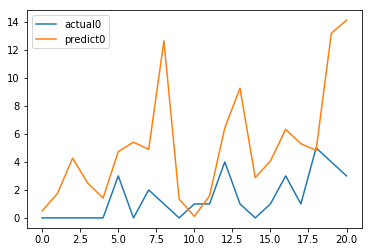

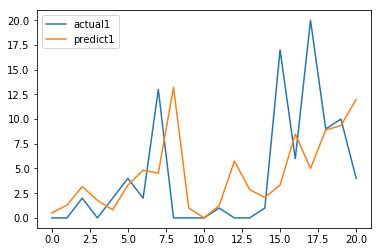

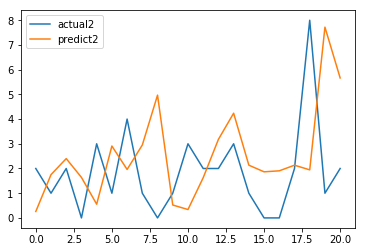

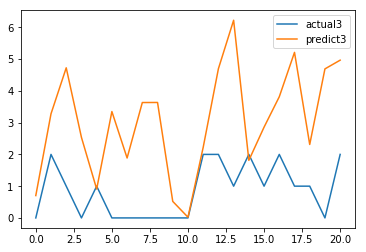

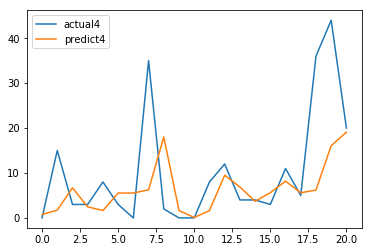

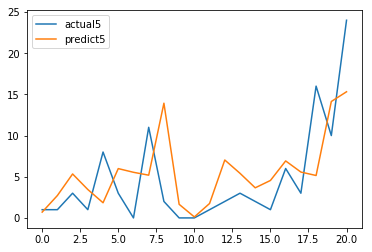

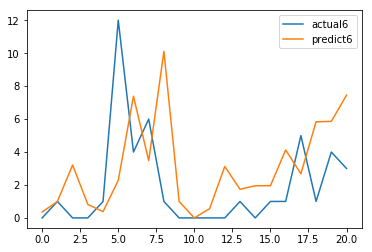

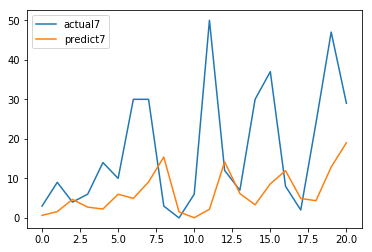

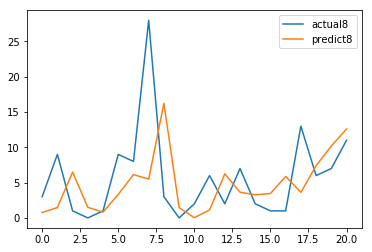

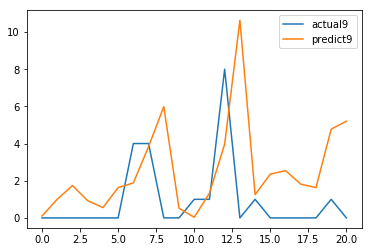

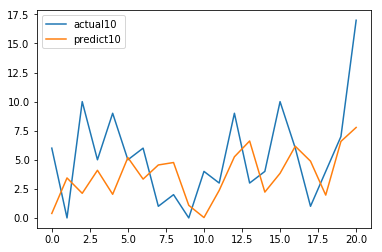

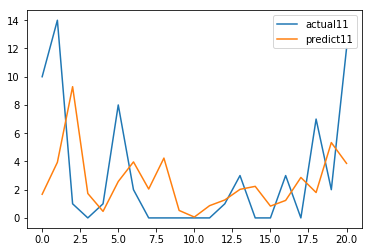

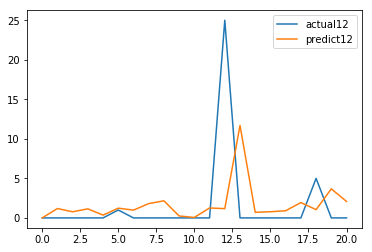

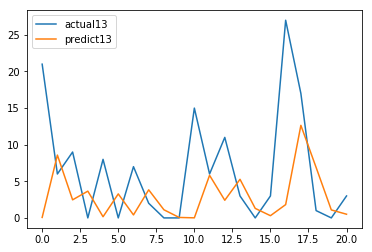

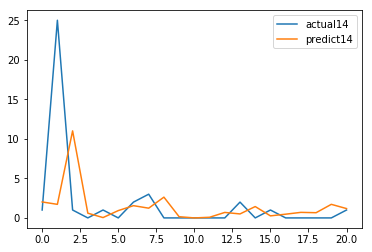

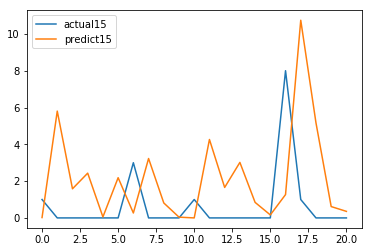

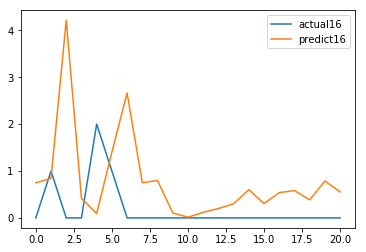

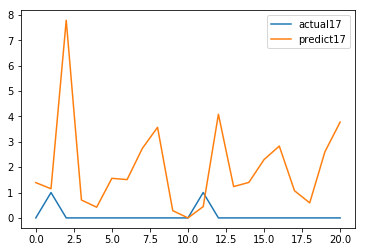

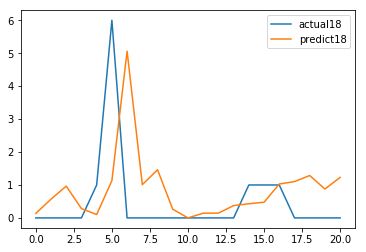

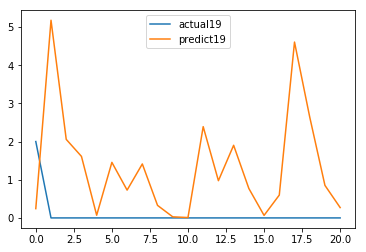

平均损失 43.3216168083


In [31]:
# plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
loss = []
for i in range(actual.shape[1]):
    plt.plot(actual[:,i],label='actual{}'.format(i))
    plt.plot(predict[:,i],label='predict{}'.format(i))
    l = np.sum((actual[:,i]-predict[:,i])**2)/len(actual)
    loss.append(l)
    plt.legend()
    plt.show()
print('平均损失',np.mean(loss))